# 5x5 Grid World

In [1]:
import numpy as np
import random, os
import matplotlib.pyplot as plt
from tqdm import tqdm
from grid_world_5x5 import *

Actions:
* 0 - Left
* 1 - Down
* 2 - Right
* 3 - Up

Agent Position:  1.1

## Environment


Size of the environment:  5
Observations in the environment:  25
Actions in the environment:  4

Reward grid: 
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

Position grid: 
[[0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [1.1 0.  0.  0.  0. ]]

Render: 


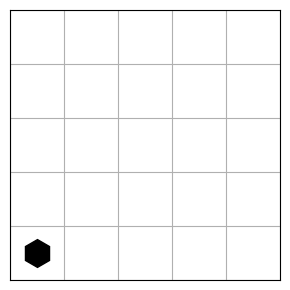

In [2]:
grid_world = GridWorld(size=5, noisyMoveChance=0.3, EnableNoise=True)

print('\nSize of the environment: ', grid_world.get_size())

print('Observations in the environment: ', grid_world.get_observations())

print('Actions in the environment: ', grid_world.get_available_moves())

print('\nReward grid: ')
grid_world.print_reward_grid()

print('Position grid: ')
grid_world.print_position_grid()

print('Render: ')
grid_world.render()


 Observation after a step (right): (x, y, state, reward, done)

 (3, 0, 15, 0.0, False)


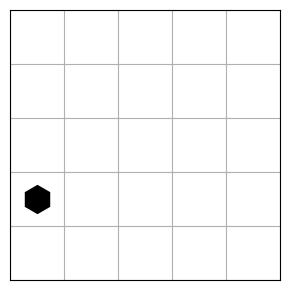

In [3]:
print('\n Observation after a step (right): (x, y, state, reward, done)\n\n',grid_world.step(2))
grid_world.render()

grid_world.basic_reset()

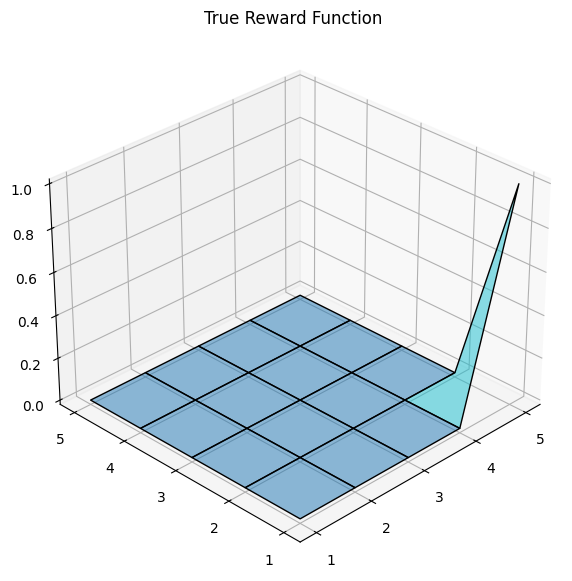

In [4]:
# plot true reward function

grid_world.plot_reward_function(grid_world.RewardGrid, 'True Reward Function', 
                     filename='../Results/Discrete Grid World/True Reward Function')

## Train Agent (Q Learning)

Training agent for 20000 episodes..: 100%|█| 20000/20000 [00:01<00:00, 15281.78i


Trained Expert.

Q Table:

[[0.34409631 0.35118906 0.48641435 0.3552607 ]
 [0.39294944 0.39310382 0.72726243 0.38731003]
 [0.48662361 0.48741304 0.75780145 0.47964308]
 [0.50916658 0.50290783 0.97025384 0.49478833]
 [0.         0.         0.         0.        ]
 [0.32661107 0.33413302 0.53772583 0.32480744]
 [0.35587198 0.35661284 0.3775716  0.65653455]
 [0.45320202 0.43324568 0.79286798 0.45401147]
 [0.48692984 0.49774103 0.48593656 0.85554861]
 [0.48861083 0.48072253 0.47555996 0.87948295]
 [0.29431812 0.29320739 0.2968818  0.42974708]
 [0.33767243 0.3186377  0.53673626 0.33569116]
 [0.36029338 0.37537911 0.39368998 0.62331277]
 [0.42779143 0.39827033 0.73421063 0.43809835]
 [0.43998707 0.47401204 0.45431691 0.89446716]
 [0.27560959 0.2552773  0.27704846 0.37403806]
 [0.30841907 0.30711204 0.29859924 0.4479426 ]
 [0.33959494 0.34231697 0.55326158 0.35316354]
 [0.37580563 0.39227984 0.64561992 0.38212278]
 [0.42182334 0.4205515  0.4149648  0.77190106]
 [0.22712419 0.22473601 0.4067546

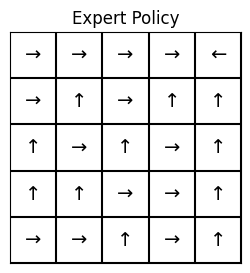


A Trajectory executed by Agent:


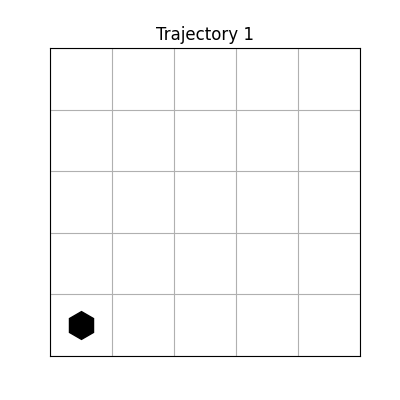

15 Trajectories executed by Agent:



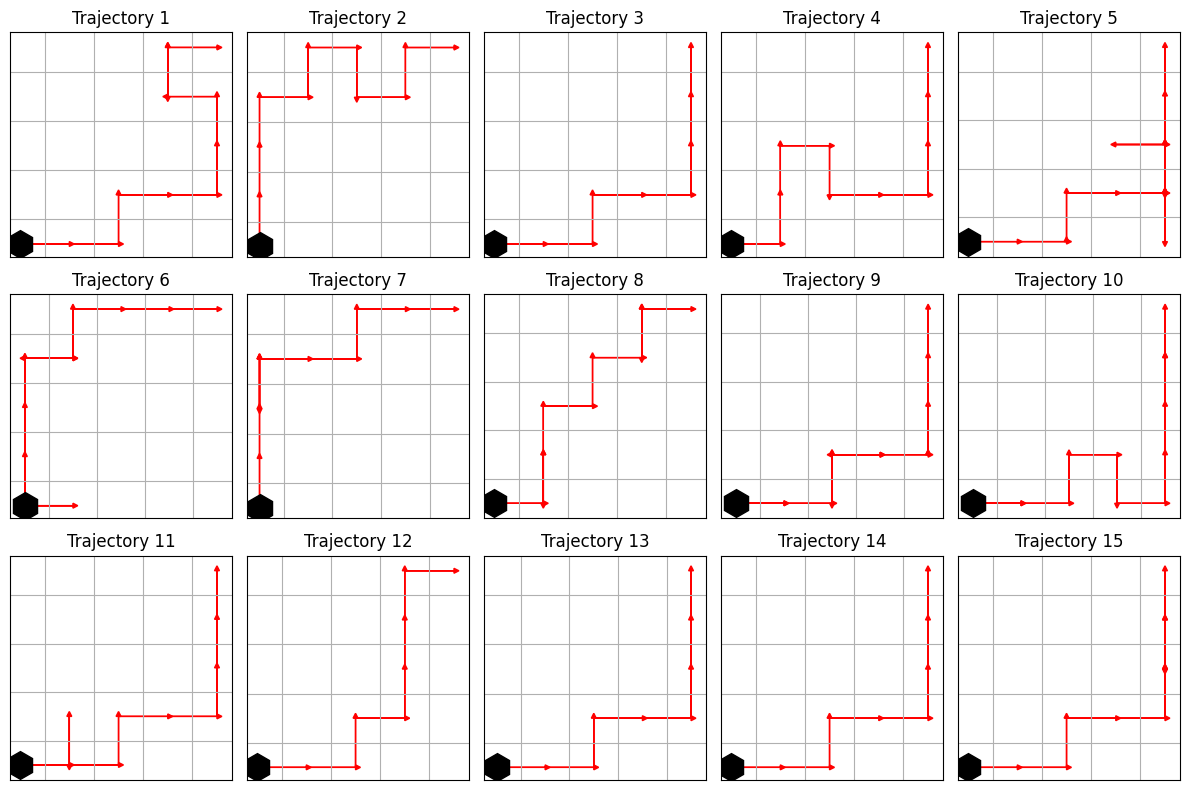

Saving rendered trajectories..: 100%|███████████| 15/15 [00:06<00:00,  2.23it/s]


In [5]:
trainer = GridWorldTrainer(grid_world)

# Train the expert using Q learning
trainer.train_agent(20000)
print('Trained Expert.\n')
print('Q Table:\n')
trainer.print_q_table()

print('Policy Matrix:\n')
trainer.get_policy(trainer.Q)
trainer.print_policy_matrix()

print('')
print('Policy Matrix with Directions:')
trainer.plot_policy_directional_matrix(trainer.matrix, title='Expert Policy')

num_trajectories = 15

print('\nA Trajectory executed by Agent:')
trainer.get_trajectories(trainer.matrix, num_trajectories)
trainer.render_trajectory(0, filename='../Results/Discrete Grid World/Agent Trajectory 01.gif', show=True)

print(f'{num_trajectories} Trajectories executed by Agent:\n')
trainer.visualize_trajectories(filename='../Results/Discrete Grid World/Agent Trajectories.png')

for trajectory in tqdm(range(len(trainer.Trajectories)), desc='Saving rendered trajectories..'):
    if trajectory+1<=9:
        trainer.render_trajectory(trajectory=trajectory, filename=f'../Results/Discrete Grid World/Agent Trajectory 0{trajectory+1}.gif')
    else:
        trainer.render_trajectory(trajectory=trajectory, filename=f'../Results/Discrete Grid World/Agent Trajectory {trajectory+1}.gif')

In [6]:
# function to generate transition matrix

def construct_transition_matrix(size=5, states=25, actions=4, noisy_move_chance=0.3):
    transition_matrix = np.zeros([states, states, actions])

    for state in range(states):
        for action in range(actions):
            i = int(state / size)
            j = state % size

            prob_stay = 1     # probability of staying in the current state

            # updating transition probabilities based on the chosen action
            if action == 0:  # Left
                if 0 < j:    # not at the left edge of the grid
                    prob_stay = prob_stay - (1 - noisy_move_chance)   # (1 - noisy_move_chance) = probability of a deterministic transition
                    j2 = j - 1      # update col index
                    transition_matrix[state][int(i * size + j2)][action] = 1 - noisy_move_chance    # int(i * size + j2) = index of the resulting state

            elif action == 1:  # Down
                if i < size - 1:
                    prob_stay = prob_stay - (1 - noisy_move_chance)
                    i2 = i + 1
                    transition_matrix[state][int(i2 * size + j)][action] = 1 - noisy_move_chance

            elif action == 2:  # Right
                if j < size - 1:
                    prob_stay = prob_stay - (1 - noisy_move_chance)
                    j2 = j + 1
                    transition_matrix[state][int(i * size + j2)][action] = 1 - noisy_move_chance

            elif action == 3:  # Up
                if 0 < i:
                    prob_stay = prob_stay - (1 - noisy_move_chance)
                    i2 = i - 1
                    transition_matrix[state][int(i2 * size + j)][action] = 1 - noisy_move_chance

            # updating transition probabilities based on the noisy actions (stochastic behavior)
            if 0 < j:
                prob_stay = prob_stay - (noisy_move_chance / 4)       # since 4 possible actions
                j2 = j - 1
                transition_matrix[state][int(i * size + j2)][action] += (noisy_move_chance / 4)

            if i < size - 1:
                prob_stay = prob_stay - (noisy_move_chance / 4)
                i2 = i + 1
                transition_matrix[state][int(i2 * size + j)][action] += (noisy_move_chance / 4)

            if j < size - 1:
                prob_stay = prob_stay - (noisy_move_chance / 4)
                j2 = j + 1
                transition_matrix[state][int(i * size + j2)][action] += (noisy_move_chance / 4)

            if 0 < i:
                prob_stay = prob_stay - (noisy_move_chance / 4)
                i2 = i - 1
                transition_matrix[state][int(i2 * size + j)][action] += (noisy_move_chance / 4)

            # probability of staying too small
            if prob_stay < 10**-15:
                prob_stay = 0
            transition_matrix[state][state][action] = prob_stay

    return transition_matrix

In [7]:
print('\nTransition matrix from state 0 to all other states under the 4 actions and noisy probability of 0.3: \n')
construct_transition_matrix()[0]


Transition matrix from state 0 to all other states under the 4 actions and noisy probability of 0.3: 



array([[0.85 , 0.15 , 0.15 , 0.85 ],
       [0.075, 0.075, 0.775, 0.075],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.075, 0.775, 0.075, 0.075],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ]])

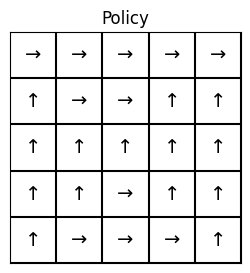

In [8]:
# 'Given' optimal policy
optimum_policy = [[2, 2, 2, 2, 2],
                 [3, 2, 2, 3, 3],
                 [3, 3, 3, 3, 3],
                 [3, 3, 2, 3, 3],
                 [3, 2, 2, 2, 3]]

trainer.plot_policy_directional_matrix(optimum_policy)

In [9]:
from scipy.optimize import linprog    # for linear programming

In [10]:
# linear programming approach for solving the inverse reinforcement learning problem (returns the reward function for given policy)

def perform_inverse_reinforcement_learning(policy, gamma=0.5, l1=10):
    trans_probs = construct_transition_matrix(size=5, states=25, actions=4, noisy_move_chance=0.3)
    conditions = []
    c = np.zeros([3 * 25])    # coefficients

    for i in range(25):
        optimal_action = policy[i]      # a1
        temp_trans_prob_matrix = gamma * trans_probs[:, :, optimal_action]      # γ⋅Pa1
        temp_inverse = np.linalg.inv(np.identity(25) - temp_trans_prob_matrix)  # (I−γ⋅Pa1​)^−1

        for j in range(4):
            if j != optimal_action:
                condition = -np.dot(trans_probs[i, :, optimal_action] - trans_probs[i, :, j], temp_inverse)   # (Pa1​−Pa​)(I−γ⋅Pa1​)^−1
                conditions.append(condition)

    equality = np.zeros(625)    # 625 equality constraints in the lp problem
    c[25:2 * 25] = -1           # ensure that rewards for non-optimal actions are negative
    c[2 * 25:] = l1             # regularization term

    conditions = np.array(conditions)   # contains coefficients
    conditions = np.reshape(conditions, [625, 75])      # 75 coefficients
    print(len(c), conditions.shape)
    rewards = linprog(c, A_ub=conditions, b_ub=equality)

    return rewards

75 (625, 75)


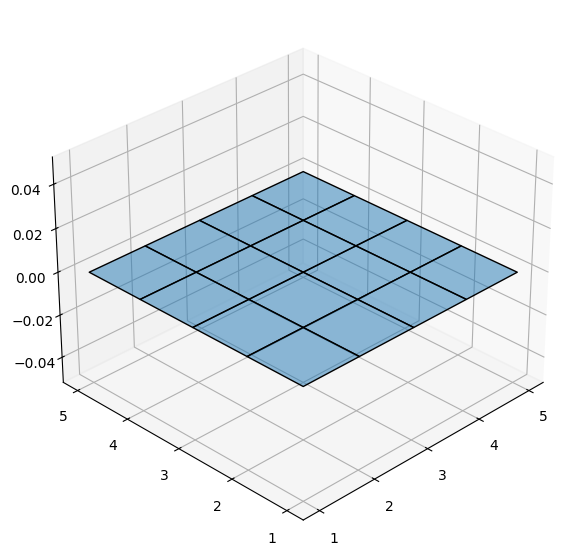

In [11]:
policy = np.reshape(trainer.matrix,[25,1])
# policy = np.reshape(optimum_policy,[25,1])

reward = perform_inverse_reinforcement_learning(policy,gamma=0.5,l1=1)
reward = reward['x'][:25]
reward = np.reshape(reward,[5,5])

grid_world.plot_reward_function(reward)    # we get a degenerate reward function

In [12]:
from cvxopt import matrix, solvers

In [13]:
# function to set up the constraints and variables for the linear programming problem

def initialize_solver_matrix(penalty=10):
    # For all states and all possible non-optimal actions to all states

    A = np.zeros([25**2, 3 * 25])     # linear inequality constraints
    b = np.zeros([25**2])             # right-hand side values for the linear constraints
    x = np.zeros([3 * 25])            # variables

    def initialize():
        size = 25
        num = 150   #offset
        i = 0

        while i < 25:
            A[num + i, i] = 1
            A[num + size + i, i] = -1

            j = 2
            while j < 4:
                A[num + j * size + i, i] = 1
                A[num + j * size + i, 2 * size + i] = -1
                j += 1

            b[num + i] = 1
            b[num + size + i] = 0
            i += 1

    initialize()

    x[25:] = -1
    x[-25:] = penalty

    return A, b, x

In [14]:
# optimization step for inverse reinforcement learning
# aims to maximize the rewards associated with optimal actions and penalize non-optimal actions

def perform_optimized_IRL(policy, gamma=0.5, penalty=10):
    TransitionMatrix = construct_transition_matrix()

    A, b, x = initialize_solver_matrix(penalty)
    i = 0

    while i < 25:
        optimalAction = policy[i][0]
        tempTransProbMatrix = gamma * TransitionMatrix[:, :, optimalAction]           # γ⋅Pa1
        patialInvertedMatrix = np.linalg.inv(np.identity(25) - tempTransProbMatrix)   #(I−γ⋅Pa1​)^−1

        temp = 0
        j = 0

        while j < 4:
            if j != optimalAction:      # penalize non-optimal actions
                otherPartialMatrix = TransitionMatrix[i, :, optimalAction] - TransitionMatrix[i, :, j]  # Pa1​−Pa
                val = -np.dot(otherPartialMatrix, patialInvertedMatrix)       # (Pa1​−Pa​)(I−γ⋅Pa1​)^−1
                pos = 25 * 3                        # starting index for the additional set of constraints related to the penalty term
                A[i * 3 + temp, :25] = val          # constraints associated with the reward vector for state i and the observed optimal action
                A[pos + i * 3 + temp, :25] = val    # constraints associated with the penalty term.
                A[pos + i * 3 + temp, 25 + i] = 1   # additional constraint to enforce the penalty term in the linear programming problem.
            else:
                temp = temp - 1
            temp = temp + 1
            j = j + 1
        i = i + 1

    x = matrix(x)
    A = matrix(A)
    b = matrix(b)

    return solvers.lp(x, A, b)

In [15]:
# perform IRL to obtain reward function

policy = np.reshape(optimum_policy, [25, 1])

rewards = perform_optimized_IRL(policy, gamma=0.1, penalty=1.05)
rewards = rewards['x']
rewards = rewards[:5 * 5]
rewards = rewards / max(rewards)      # normalize the rewards
rewards = np.reshape(rewards, [5, 5])

true = np.abs(trainer.env.RewardGrid)   # true rewards
obtained = np.abs(rewards)                          # estimated rewards
errors = true - obtained

error = np.abs(np.sum(np.sum(errors)))
print('\nError: \n',error)

     pcost       dcost       gap    pres   dres   k/t
 0:  1.3125e+01 -3.1742e+01  1e+03  5e+00  7e+00  1e+00
 1: -9.1001e-01 -1.3208e+01  2e+02  1e+00  2e+00  1e+00
 2: -3.8381e-01 -2.1218e+00  2e+01  2e-01  4e-01  6e-01
 3: -4.4051e-01 -1.2314e+00  8e+00  1e-01  2e-01  2e-01
 4: -4.2609e-01 -6.7149e-01  2e+00  3e-02  5e-02  4e-02
 5: -4.1735e-01 -5.0245e-01  7e-01  1e-02  1e-02  8e-03
 6: -4.3122e-01 -4.5420e-01  2e-01  3e-03  4e-03  2e-03
 7: -4.3303e-01 -4.4052e-01  6e-02  9e-04  1e-03  4e-04
 8: -4.3247e-01 -4.3587e-01  3e-02  4e-04  6e-04  9e-05
 9: -4.3246e-01 -4.3335e-01  7e-03  1e-04  1e-04  2e-05
10: -4.3232e-01 -4.3270e-01  3e-03  4e-05  6e-05  6e-06
11: -4.3226e-01 -4.3234e-01  7e-04  9e-06  1e-05  1e-06
12: -4.3224e-01 -4.3226e-01  2e-04  3e-06  4e-06  4e-07
13: -4.3223e-01 -4.3224e-01  5e-05  6e-07  9e-07  9e-08
14: -4.3223e-01 -4.3223e-01  1e-05  1e-07  2e-07  2e-08
15: -4.3223e-01 -4.3223e-01  9e-07  1e-08  2e-08  1e-09
16: -4.3223e-01 -4.3223e-01  5e-08  7e-10  1e-09  

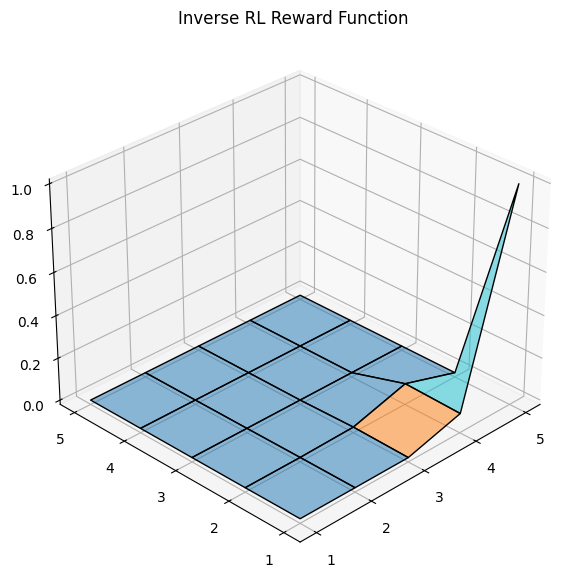

In [16]:
grid_world.plot_reward_function(rewards, 'Inverse RL Reward Function', 
                                filename='../Results/Discrete Grid World/Obtained Reward Function')

     pcost       dcost       gap    pres   dres   k/t
 0:  3.1250e+01 -3.1664e+01  2e+03  5e+00  6e+00  1e+00
 1:  1.2389e+00 -1.2478e+01  2e+02  1e+00  1e+00  8e-01
 2:  1.7758e-01 -1.0382e+00  1e+01  1e-01  1e-01  2e-01
 3:  4.2029e-03 -1.2347e-02  2e-01  2e-03  2e-03  3e-03
 4:  4.1974e-05 -1.2333e-04  2e-03  2e-05  2e-05  3e-05
 5:  4.1973e-07 -1.2333e-06  2e-05  2e-07  2e-07  3e-07
 6:  4.1973e-09 -1.2333e-08  2e-07  2e-09  2e-09  3e-09
 7:  4.1973e-11 -1.2333e-10  2e-09  2e-11  2e-11  3e-11
Optimal solution found.


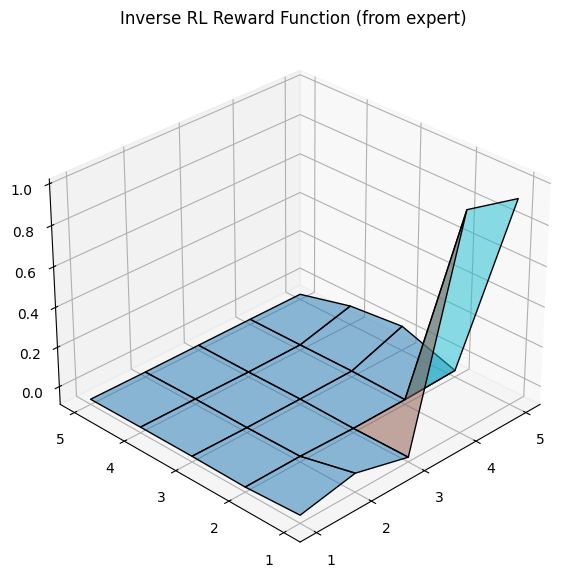

In [17]:
policy = np.reshape(trainer.matrix, [25, 1])

rewards = perform_optimized_IRL(policy, gamma=0.1, penalty=2.5)
rewards = rewards['x']
rewards = rewards[:5 * 5]
rewards = rewards / max(rewards)
rewards = np.reshape(rewards, [5, 5])

grid_world.plot_reward_function(rewards, 'Inverse RL Reward Function (from expert)', 
                     filename='../Results/Discrete Grid World/Obtained Reward Function [from Expert]')